# HW5 

This HW deals with data visualization. Remember that your visuals need to be informative and clear - in essence, they need to tell a story. 

The grading in this HW will be subjective, since everyone will have different ways of making their visualizations. Understandably, this does lead to students asking questions like 'is my plot good enough?'. 

The best we can do is offer suggestions; ultimately, it’s up to you to decide for yourself. Some questions you can ask yourself to make sure:
* Does my plot have a title? Axis labels? A legend (if applicable)?
* Is it clear and easily readable?
* Does it tell a story? (Is it a true and interesting story?)


You will find these links to documentation useful

http://matplotlib.org/examples/ - A gallery of examples

https://pandas.pydata.org/pandas-docs/stable/visualization.html

As with all your HWs, you will have to insert cells under each question in order to answer them. All your plots need to be inline. 

In order to ensure your plots are inline, make sure to run the matplotlib magic command. You will see it in the second cell of this HW.

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## Q1 

Visit the URL below and download the corresponding csv:
https://www.opendataphilly.org/dataset?q=crime

In [5]:
incidents = pd.read_csv('crimes.csv')

This dataset is a record of crime that has occurred in Philly.
Draw a line graph with x axis being the hours and the y axis being the number of criminal incidents that occur during those hours. What hour of the day (24 hr day) is the "most dangerous"?

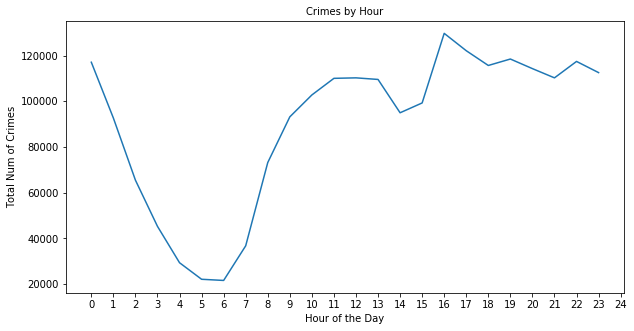

In [6]:
crimes_by_hour = incidents.groupby('Hour', as_index=False)
counted_crimes_by_hour = crimes_by_hour.agg({'DC Number' : 'count'})
counted_crimes_by_hour = counted_crimes_by_hour.rename(columns = {'DC Number' : 'Number of Crimes'})
plt.figure(figsize = (10,5))
plt.title('Crimes by Hour', size = 'medium')
plt.xticks(np.arange(0, 25, 1))
plt.xlabel('Hour of the Day')
plt.ylabel('Total Num of Crimes')
plt.plot(counted_crimes_by_hour['Hour'], counted_crimes_by_hour['Number of Crimes'])

- As shown by the graph, the 16th hour of the day has the highest count of crimes, so it is the most dangerous. 

## Q2 

Use the world-data.csv that can be found in your HW5 folder to get a dataset that has the population for countries of the world.

Histogram the population of the world by creating appropriate buckets for the population.

*You are allowed to make multiple histograms in this question. The population of the world provides some interesting outliers. You are allowed to remove them as long as you make a note of it.*

In [7]:
world_data = pd.read_csv('world-data.csv')
world_data = world_data.sort_values('population', ascending = False)

#df for countries with population over 1 bil, essentially just China and India
top_popcount = world_data[world_data['population'] > 1000000000] 
#df for countries with population between 1 bil and 50 mil, from USA to South Africa
middle_popcount = world_data[np.logical_and(world_data['population'] > 50000000, 
                          world_data['population'] < 1000000000)] 
#df for countries with population less than 50 mil
low_popcount = world_data[world_data['population'] < 50000000] 


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Countries with Population Greater than 1 billion')

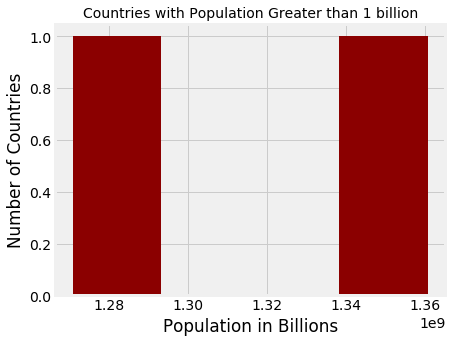

In [8]:
plt.figure(figsize = (7,5))
plt.style.use('fivethirtyeight')
n, bins, patches = plt.hist(top_popcount['population'], bins=4, color = 'darkred')
plt.xlabel('Population in Billions')
plt.ylabel('Number of Countries')
plt.grid('on')
#world_data.hist('population')
#plt.xlabel('Population')          
plt.title('Countries with Population Greater than 1 billion', size = 'medium')


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Countries with Population Between 50 Million and 1 Billion')

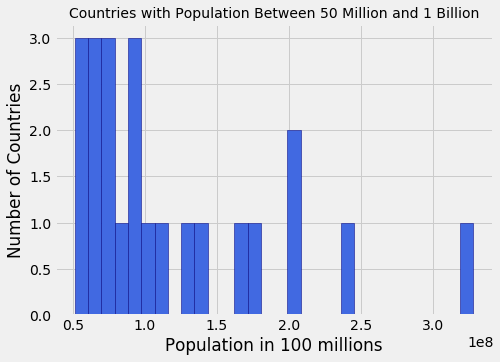

In [9]:
plt.figure(figsize = (7,5))
plt.style.use('fivethirtyeight')
n, bins, patches = plt.hist(middle_popcount['population'], bins=30, color = 'royalblue', ec='navy')
plt.xlabel('Population in 100 millions')
plt.ylabel('Number of Countries')
plt.grid('on')
#world_data.hist('population')
#plt.xlabel('Population')          
plt.title('Countries with Population Between 50 Million and 1 Billion', size = 'medium')


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Countries with Population Less Than 50 Million')

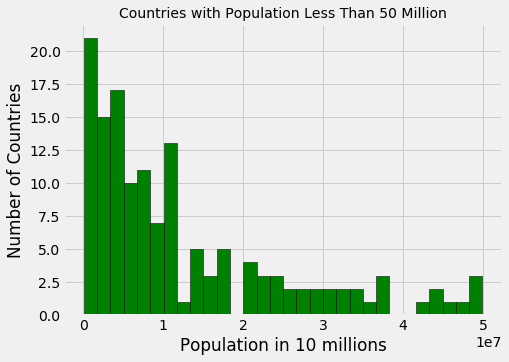

In [10]:
plt.figure(figsize = (7,5))
plt.style.use('fivethirtyeight')
n, bins, patches = plt.hist(low_popcount['population'], bins=30, color = 'green', ec='black')
plt.xlabel('Population in 10 millions')
plt.ylabel('Number of Countries')
plt.grid('on')
#world_data.hist('population')
#plt.xlabel('Population')          
plt.title('Countries with Population Less Than 50 Million', size = 'medium')


## Q3

Draw a pie chart of the number of different schools in the city sliced by the different education levels. Use the data set from HW3. Categorize the data as Elementary, Middle, High and Other. No other categories allowed. If a school offers both elementary education and middle school education it will be counted in both of those categories.

*Warning: This question will require data cleaning. Get started early*

In [11]:
schools = pd.read_csv('/Users/elizabeth/downloads/Schools.csv')
schools = schools.rename(columns = {'GRADE_LEVEL' : 'GRADES', 'FACIL_ADDRESS': 'ADDRESS', 'FACIL_NAME' : 'NAMES',
                                    'FACIL_TELEPHONE' : 'TELEPHONE', 'GRADE_ORG' : 'GRADE_NUMBERS',
                                   'X' : 'LONGITUDE', 'Y' : 'LATITUDE'})

In [12]:
#cleaning data by 1) dropping NaN values under 'GRADES', 1) Uppercasing all values under 'GRADES'
schools = schools.dropna(subset = ['GRADES'], how = "any") #drops rows where the grade of the school is NaN
vect_upper = np.vectorize(str.upper)
schools['GRADES'] = schools['GRADES'].apply(vect_upper) #makes all the grades uppercase for sorting ease

In [13]:
#Setting up 4 dataframes with for Elem, Mid, High, and Other schools.
elementary_schools = schools[schools['GRADES'].str.contains('ELEM')] #df for elem schools
middle_schools = schools[schools['GRADES'].str.contains('MID')] #df for middle schools
high_schools = schools[schools['GRADES'].str.contains('HIGH')] #df for high schools
other_schools = schools[np.logical_and(np.logical_and(schools["GRADES"].str.contains('ELEM') == False,
                                            schools["GRADES"].str.contains('MID') == False), 
                                            schools["GRADES"].str.contains('HIGH') == False)] #df for other schools

In [14]:
#Making a new df with the different levels of schools and the number of schools per each level.
schools_by_grade = pd.DataFrame({ "level" : ["Elementary", "Middle", "High", "Other"], 
              "number of schools" : [len(elementary_schools), len(middle_schools), len(high_schools), len(other_schools)]})
schools_by_grade


,level,number of schools
0,Elementary,346
1,Middle,313
2,High,169
3,Other,38


Text(0.5,1,'Number of Schools by Level')

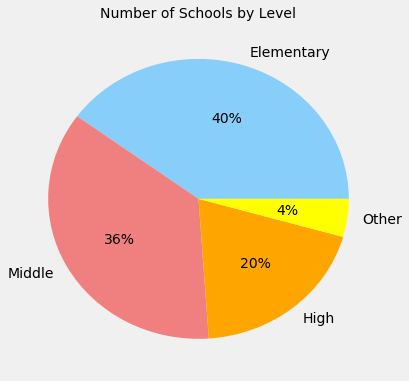

In [15]:
fig = plt.figure(figsize = (6,6))
sizes = schools_by_grade['number of schools']
labels = schools_by_grade['level']
colors = ["lightskyblue", "lightcoral", "orange", "yellow"]
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.0f%%')
plt.title('Number of Schools by Level', size = 'medium')

## Q4 

Using the Philadelphia education dataset from HW3 draw a bar graph which represents average enrollment by zipcode. Sort the data appropriately so that useful information can be conveyed as quickly as possible.

In [16]:
schools = pd.read_csv('Schools.csv')
schools = schools.dropna(subset = ['ZIPCODE'], how = "any")
schools.head()

,X,Y,OBJECTID,AUN,SCHOOL_NUM,LOCATION_ID,FACIL_NAME,FACILNAME_LABEL,FACIL_ADDRESS,ZIPCODE,FACIL_TELEPHONE,ACTIVE,GRADE_LEVEL,GRADE_ORG,ENROLLMENT,TYPE,TYPE_SPECIFIC
0,-74.98762752,40.059143,1.0,226514402.0,NaN,NaN,Nazareth Academy High School,Nazareth Acad HS,4001 GRANT AVE,19114,(215) 637-7676,Open,High School,12-Sep,432.0,Private,Private
1,-75.22716009,39.953432,2.0,126515001.0,3807.0,1330.0,Global Leadership Academy Southwest,Global Leadership Academy at Huey,5200 Pine St,19143 - 4111,NaN,Open,Elem/Middle,K-8,562.0,Charter,Charter
2,-75.12907671,39.978757,3.0,226510512.0,NaN,NaN,Bethel Baptist Academy,Bethel Baptist Acad,2210 E SUSQUEHANNA AVE,19125,(215) 426-1909,Open,Elem/Mid/High,pre K-12,53.0,Private,Private
3,-75.24252029,39.920064,4.0,226511922.0,NaN,NaN,Greater Hope Christian Academy,Greater Hope Christian Acad,7029 WOODLAND AVE,19142,215-729-0374,Open,Elem/Mid/High,K-12,114.0,Private,Private
4,-75.21135429,39.955477,5.0,226512762.0,NaN,NaN,Islamic Education School,Islamic Education Sch,4431-39 WALNUT ST,19104,(215) 387-8888,Open,Elem/Middle,pre K-8,50.0,Private,Private


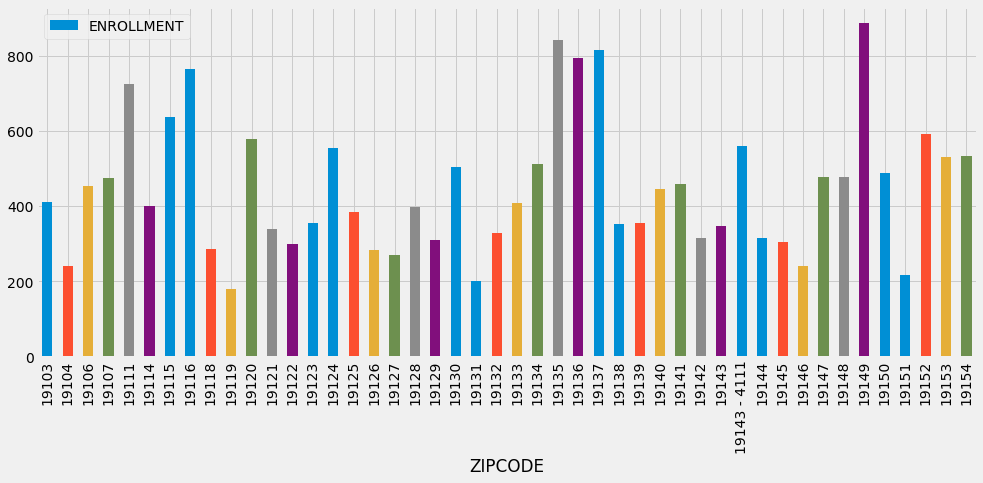

In [17]:
grouped_zips = schools.groupby("ZIPCODE", as_index=False)
avg_enrollment = grouped_zips.agg({"ENROLLMENT" : "mean"})
avg_enrollment = avg_enrollment.dropna(subset= ['ENROLLMENT'], how = "any")
avg_enrollment.plot.bar(x = 'ZIPCODE', y = 'ENROLLMENT', figsize = (15,6))


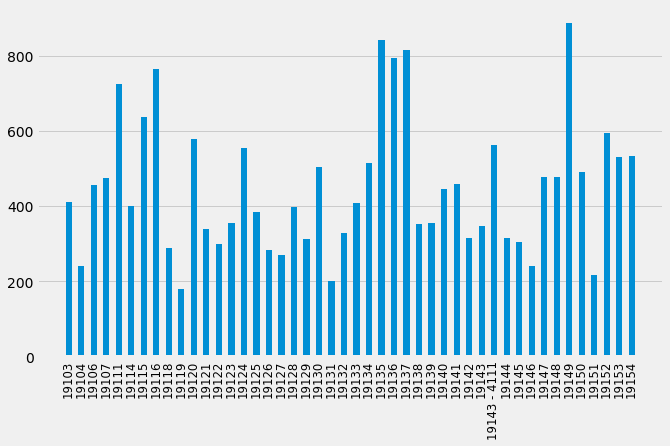

In [18]:
plt.figure(figsize=(10,6))

#x is the x coordinates for each bar
plt.bar(x = np.arange(len(avg_enrollment)), height = avg_enrollment['ENROLLMENT'], width= 0.5)
plt.xticks(np.arange(len(avg_enrollment)), avg_enrollment['ZIPCODE'], rotation = 'vertical', size= 'small')
plt.grid(axis = 'x')

## Q5

Using the academy awards dataset provided in this HW we want you to show us the distribution of ages of the best actor winners. On the same graph plot the distribution of ages of the best actress winners. Using just the graph, what is your observation about the relative ages of best actor winners versus the best actress winners. Are there any outliers? (an outlier is any data point that does not fit the general pattern of data).Write your observations (briefly please) in a separate markdown cell.

In [19]:
actors = pd.read_csv('acting.csv')
actors.head()

,Year,Male Age,Actor,Male Movie,Female Age,Actress,Female Movie,Unnamed: 7
0,1928,44,Emil Jannings,The Last Command,22,Laura Gainor (aka Janet Gaynor),Sunrise,NaN
1,1929,38,Warner Baxter,In Old Arizona,37,Mary Pickford,Coquette,NaN
2,1930,62,George Arliss,Disraeli,30,Norma Shearer,The Divorcee,NaN
3,1931,53,Lionel Barrymore,A Free Soul,62,Marie Dressler,Min and Bill,NaN
4,1932,41,W. Beery(47)/F. March(35)*,The Champ/Dr. Jekyll and Mr. Hyde,32,Helen Hayes,Sin of Madelon,NaN


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


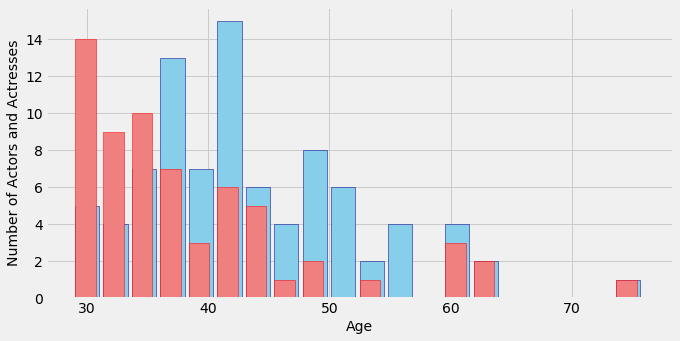

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
plt.xlabel('Age', size = "medium")
plt.ylabel('Number of Actors and Actresses', size = "medium")
plt.grid('on')
n, bins_actors, patches = plt.hist(actors['Male Age'], bins = 20, normed = 0, ec = 'darkblue',
                            width = 2.0, color = 'skyblue')
n, bins, patches = plt.hist(actors['Female Age'], bins = bins_actors, normed = 0, ec = 'red',
                            width = 1.7, color = 'lightcoral')


- from the graph, it seems that the most Best Actors are in their early 40s, and the most Best Actresses are in their mid 30s


This dataset was pulled from the website StatCrunch.

## Q6 

Temperature distribution - People often describe the west coast as being perfect almost all year round.
Let us use some actual data to see if that really is the case by using the weather underground website that you used for the previous HW.

We will compare Philadelphia and San Diego during June, July, and August.

In order to get this data, you will have to download data from weather underground. You will have to use the month selector three times for each of the cities.

Use this data for San Diego for August (then change it for June and July)
https://www.wunderground.com/history/monthly/us/ca/san-diego/KSAN/date/2018-8

Use this for Philadelphia (then change it for June and July)
https://www.wunderground.com/history/monthly/us/ca/san-diego/Kphl/date/2018-8

Select all of it, put it into excel or a google sheet. Feel free to do some data cleaning in excel /google sheets. Save it, then go ahead and load it up into pandas.

Once this data is loaded, we want you to provide a visualization that will help a person determine which city is nicer to live in. Pick a metric that you would like to use. Explain your reasoning for picking a city (or saying that the cities are too similar) based on your metric in a separate markdown cell.


In [21]:
san_diego = pd.read_csv('san diego june through august.csv') #df with June, July, and August data for San Diego
philadelphia = pd.read_csv('philadelphia june through august.csv') #df with June, July, and August data for Philly

In [22]:
san_diego = san_diego[['Date', 'Avg Temp', 'Avg Precipitation']] # the metric that I'm choosing is temperature. 
philadelphia = philadelphia[['Date', 'Avg Temp', 'Avg Precipitation']]


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


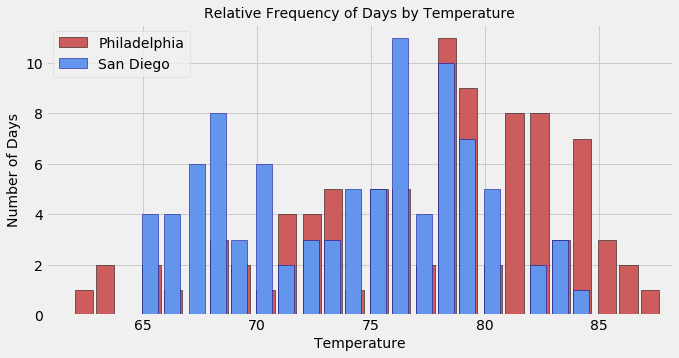

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
plt.xlabel('Temperature', size = "medium")
plt.ylabel('Number of Days', size = "medium")
plt.grid('on')
plt.title('Relative Frequency of Days by Temperature', size = 'medium')
n, bins_philly, patches = plt.hist(philadelphia['Avg Temp'], bins = 160, normed = 0, ec = 'black',
                            width = .8, color = 'indianred', label = 'Philadelphia')
n, bins, patches = plt.hist(san_diego['Avg Temp'], bins = bins_philly, normed = 0, ec = 'darkblue',
                            width = .7, color = 'cornflowerblue', label = 'San Diego')
plt.legend(loc='upper left')

- My metric of choice is temperature. As a Californian, I may be biased, but temperature is the main factor in deciding if I like the weather or not. I am not a fan of temperatures that are greater than 80 degrees. This visualization demonstrates that Philadelphia (red) has many more days in the range of 80+ degrees than San Diego (blue). To me, this suggests that San Diego, being more temperate, is a nicer city to live in. 

- Additionally, clear days are more convenient than rainy days. So, plotting the number of clear days and rainy days for Philadelphia vs. San Diego...

In [24]:
# this is a function that will tell me if precipitation > 0 
def is_rainy(x):
    if x > 0:
        return('Num of Rainy Days')
    else:
        return('Num of Clear Days')

In [25]:
philadelphia['Rain?'] = philadelphia['Avg Precipitation'].apply(is_rainy)
san_diego['Rain?'] = san_diego['Avg Precipitation'].apply(is_rainy)

In [26]:
# making a joint dataframe with both Philly and SD's weather in terms of number of clear/rainy days.
rain_in_philadelphia = philadelphia.groupby('Rain?', as_index=False)
rain_in_philadelphia = rain_in_philadelphia.agg({'Date' : 'count'})
rain_in_philadelphia = rain_in_philadelphia.rename(columns = {'Date' : 'Number of Days'})
rain_in_san_diego = san_diego.groupby('Rain?', as_index=False)
rain_in_san_diego = rain_in_san_diego.agg({'Date' : 'count'})
rain_in_san_diego = rain_in_san_diego.rename(columns = {'Date' : 'Number of Days'})

san_diego_philadelphia = pd.merge(rain_in_philadelphia, rain_in_san_diego, on = 'Rain?')
san_diego_philadelphia = san_diego_philadelphia.rename(columns = {'Number of Days_x' : 'Philadelphia',
                                                                  'Number of Days_y' : 'San Diego'})


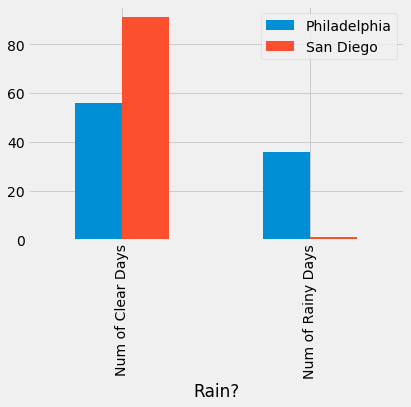

In [27]:
san_diego_philadelphia.plot.bar(x = "Rain?", y = ["Philadelphia", "San Diego"])

- We can see that Philadelphia has a significantly larger amount of rainy days, and San Diego has a significantly larger amount of clear days. In summation, San Diego's mild temperatures and lack of rain make it a more comfortable city to live in. 